# Logistic Regression

In [1]:
# Import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


## Data setup

In [2]:
# Read dataset and create training an testing datasets
training_set = pd.read_csv('../Data/train.csv')
training_set = training_set.drop(columns=["id"])
training_set["defects"] = [1 if value else 0 for value in training_set["defects"]]
training_set = training_set.rename(columns={"v(g)": "v_g", "ev(g)": "ev_g", "iv(g)": "iv_g"})

In [3]:
true_data = training_set[training_set["defects"].values == True]
false_data = training_set[training_set["defects"].values == False]

true_feature_data = true_data.drop(columns=["defects"])
false_feature_data = false_data.drop(columns=["defects"])

true_train_proportion = 0.5
false_train_proportion = true_train_proportion * len(true_feature_data) / len(false_feature_data)

true_X_train, true_X_validation, true_Y_train, true_Y_validation = train_test_split(true_feature_data, true_data["defects"], test_size=(1-true_train_proportion))
false_X_train, false_X_validation, false_Y_train, false_Y_validation = train_test_split(false_feature_data, false_data["defects"], test_size=(1-false_train_proportion))

X_train = pd.concat([true_X_train, false_X_train])
X_validation = pd.concat([true_X_validation, false_X_validation])
Y_train = pd.concat([true_Y_train, false_Y_train])
Y_validation = pd.concat([true_Y_validation, false_Y_validation])

## Model Creation

In [4]:
# Create a Logistic Regression Classifier and print coeficients
LogReg = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)
LogReg.coef_

array([[ 1.96256884e-02, -3.80772573e-03, -3.10112419e-03,
        -2.34611128e-03,  6.33078402e-03, -4.12089100e-04,
        -1.11499326e-03, -2.20627497e-02, -2.39888303e-02,
         2.29310608e-07,  5.84478523e-05, -2.94452764e-05,
         2.83804606e-03,  5.09475811e-03,  6.97301403e-03,
         1.93077657e-03, -3.02516370e-02,  3.99949355e-03,
        -4.86268183e-04,  7.25334671e-03, -6.27240238e-04]])

## Model Evaluation

In [5]:
# Calculate scores for testing dataset
scores = LogReg.predict_proba(X_validation)


In [6]:
rounded_scores = [round(item) for item in scores[:,1]]
conf_matrix = confusion_matrix(Y_validation, rounded_scores, labels=[0, 1])

recall_true = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
precision_true = conf_matrix[1][1] / (conf_matrix[0][1] + conf_matrix[1][1])
F1_true = 2 * ( (precision_true * recall_true) / (precision_true + recall_true) )

correct_vals = conf_matrix[0][0] + conf_matrix[1][1]
incorrect_vals = conf_matrix[0][1] + conf_matrix[1][0]
accuracy = correct_vals / (correct_vals + incorrect_vals)

print("Correctly predicted labelss: ", correct_vals)
print("Incorrectly predicted labelss: ", incorrect_vals)
print("Model's accuracy: ", accuracy)
print("Model's recall: ", recall_true)
print("Model's precision: ", precision_true)
print("Model's F1 score: ", F1_true)

Correctly predicted labelss:  60614
Incorrectly predicted labelss:  18085
Model's accuracy:  0.7702003837405812
Model's recall:  0.6145508151231356
Model's precision:  0.3419211656293723
Model's F1 score:  0.4393812579435196


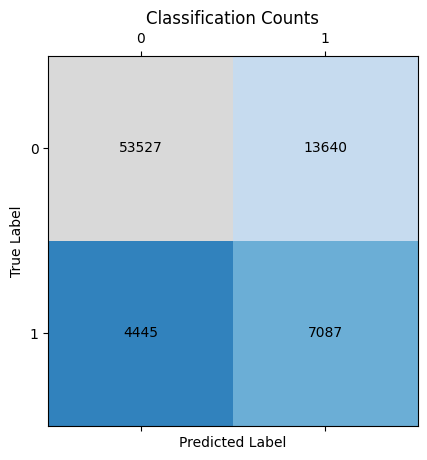

In [7]:
# Plot confusion Matrix
fig, ax = plt.subplots()
ax.matshow(conf_matrix, cmap='tab20c')

# Print classification counts within matrix boxes
for i in range(len(conf_matrix)):
   for j in range(len(conf_matrix[0])):
      c = conf_matrix[j, i]
      ax.text(i, j, str(c), va='center', ha='center')

# Set plot axis titles and show plot
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Classification Counts')
plt.show()

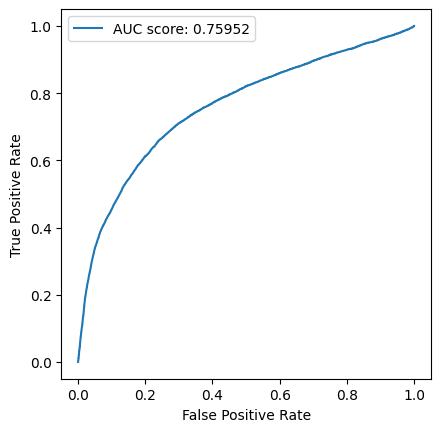

In [8]:

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(Y_validation, scores[:,1])
auc = roc_auc_score(Y_validation, scores[:,1])

# Print ROC plot
plt.plot(fpr, tpr,)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC score: " + str(round(auc, 5))], loc="best")
plt.show()